In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('Position_Salaries.csv')
df=pd.DataFrame(dataset) #Creating a dataframe
X=df.iloc[:,1:-1].values  
y=df.iloc[:,-1].values

# Feature Scaling
* Here we have to apply the feature scaling at dependant variable salaries also because we don't want the level feature to be neglected as compared to salary fetaure.
* If the values is already between 0 to 1 than we don't need to apply the feature scaling proces.

In [8]:
X  #Here it's a 2d array because the standard scalar expects the array to be 2d if it's 1d than it will throw an error

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [10]:
y=y.reshape(len(y),1)

In [11]:
y #Here it's a 2d array because the standard scalar expects the array to be 2d if it's 1d than it will throw an error

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler #standar values between -3 to +3
sc_X=StandardScaler()
sc_y=StandardScaler()  #here we have create the 2 varaiables because X have different mean and y have different mean so
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [14]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [15]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Train SVR Model on Whole Dataset

In [16]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\AmeerHamzaPC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predict a New Result

In [17]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([252789.13921624])

# Visualizing the SVR Results

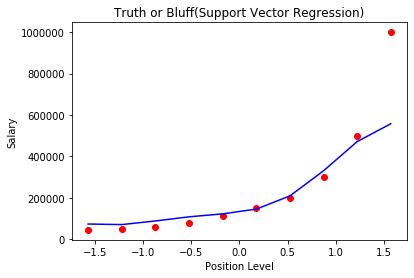

In [19]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)), color='Blue')
plt.title('Truth or Bluff(Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show() 

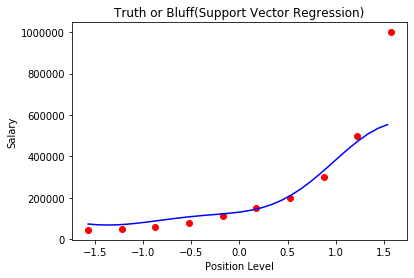

In [23]:
X_grid=np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='Blue')
plt.title('Truth or Bluff(Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel("Salary")
plt.show()